In [17]:
from EncoderClassifier.pss_datasets.pss_dataset import PSSDataset
from EncoderClassifier.utils.visualitzation import analyze_book_types, visualize_book
from EncoderClassifier.utils.data import ComicTransform
import matplotlib.pyplot as plt
import os
from transformers import SiglipImageProcessor, AutoProcessor, AutoModel
import torch
import random 
import numpy as np
import tqdm

In [18]:
root_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images'
annotations_dir = '/home/mserrao/PSSComics/Comics/DatasetDCM/comics_all_430.json'
precompute_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/EncoderClassifier/data'
checkpoint_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/EncoderClassifier/checkpoints'
data_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/EncoderClassifier/data'
out_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/EncoderClassifier/out'
    
model_id = 'openai/clip-vit-large-patch14-336'
gpu_id = 3
seed = 10
num_aug_copies = 5
num_synthetic_books = 1000

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = torch.device(f"cuda:{gpu_id}" if torch.cuda.is_available() else "cpu")

parts = model_id.split('/')[1].split('-')
backbone_name = f'{parts[0]}_{parts[-1]}'

backbone = AutoModel.from_pretrained(model_id).eval()

if 'siglip2' in backbone_name:
    processor = SiglipImageProcessor.from_pretrained(model_id)
else:
    processor = AutoProcessor.from_pretrained(model_id)
    
backbone.to(device)

if 'dinov2' in backbone_name:
    feature_dim = backbone.config.hidden_size
elif 'clip' in backbone_name:
    feature_dim = backbone.config.vision_config.projection_dim
elif 'siglip' in backbone_name:
    feature_dim = backbone.config.vision_config.hidden_size
else:
    raise ValueError(f"Warning: Unknown backbone '{backbone_name}'")

transformations = ComicTransform()

test_dataset = PSSDataset(root_dir=root_dir, 
                            model_id = model_id,
                            backbone=backbone, 
                            backbone_name = backbone_name,
                            feature_dim = feature_dim,
                            processor=processor, 
                            device=device, 
                            annotations_path=f'{data_dir}/comics_test.json', 
                            precompute_features=False,
                            precompute_dir=f'{precompute_dir}/features_test.pt', 
                            augment_data=False,
                            num_augmented_copies = num_aug_copies,
                            transform=None, 
                            removal_p=0.05,
                            num_synthetic_books=num_synthetic_books,
                            min_stories=2,
                            max_stories=3,
                            synthetic_remove_p=0.15)

Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/00411460/056.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/dbbf603f/024.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/dbbf603f/025.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/dbbf603f/026.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/dbbf603f/065.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/537de305/002.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/5b8add2a/012.jpg
Skipping unknown label image /home-local/mserrao/PSSComics/multimodal-comic-pss/datasets.unify/DCM/images/077e29b1/036.jpg
Skipping unknown

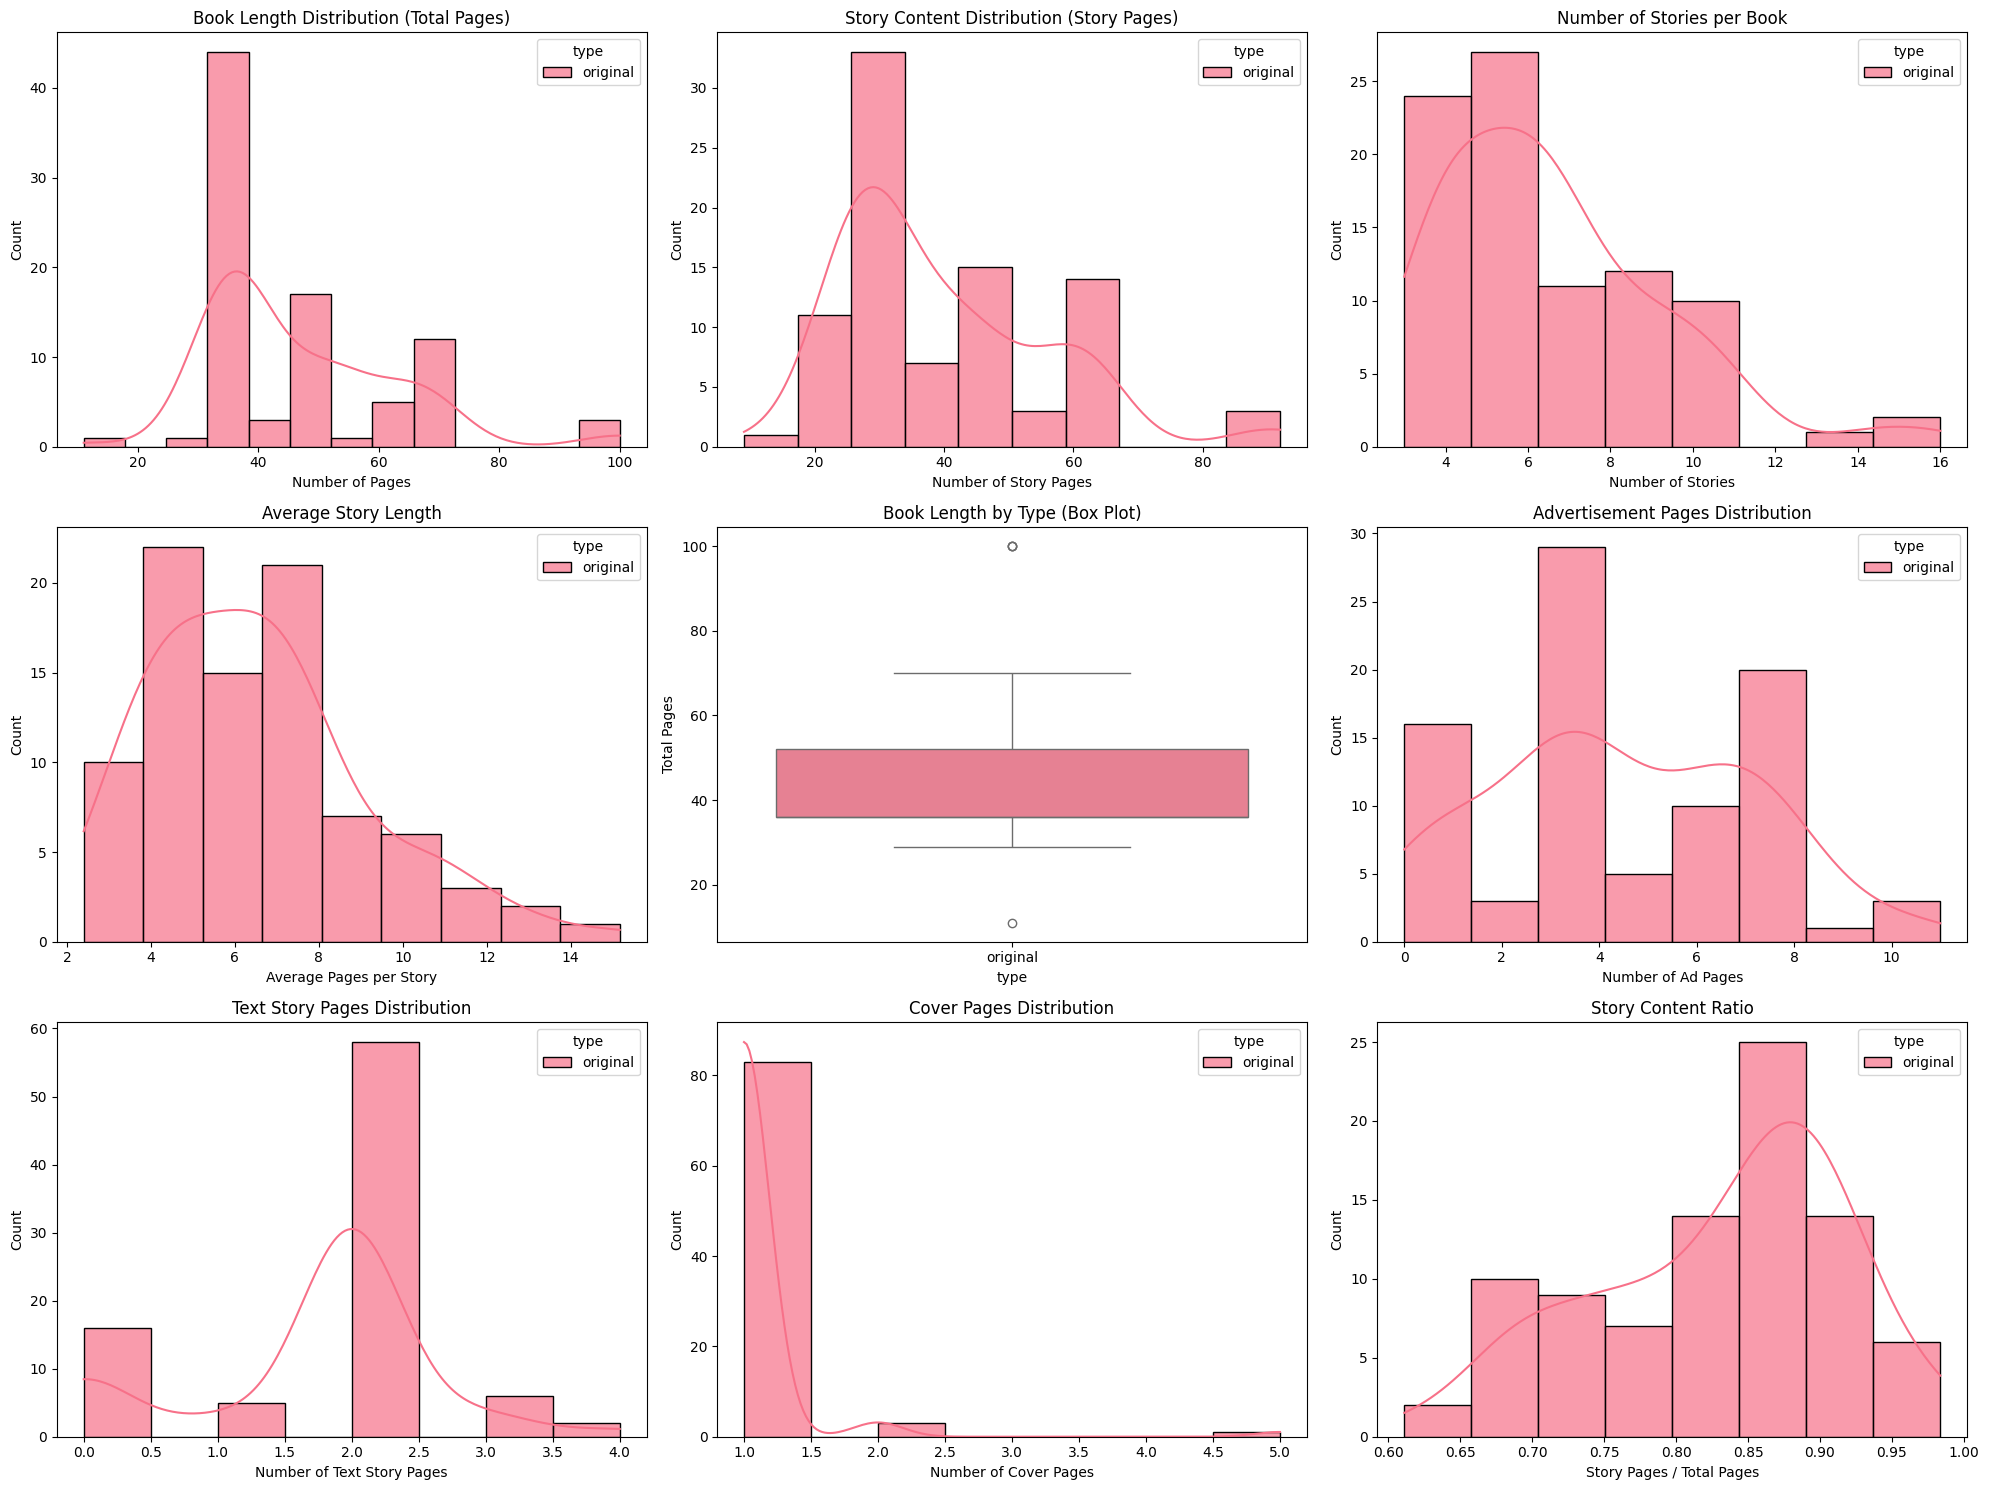

SUMMARY STATISTICS BY BOOK TYPE

ORIGINAL BOOKS (87 books):
--------------------------------------------------
total_pages         : mean=47.02, std=16.17, min=11.00, max=100.00
story_pages         : mean=39.78, std=16.44, min=9.00, max=92.00
num_stories         : mean=6.57, std=2.71, min=3.00, max=16.00
avg_story_length    : mean=6.52, std=2.59, min=2.40, max=15.17
ad_pages            : mean=4.47, std=2.69, min=0.00, max=11.00
textstory_pages     : mean=1.69, std=0.93, min=0.00, max=4.00
cover_pages         : mean=1.08, std=0.46, min=1.00, max=5.00

STATISTICAL COMPARISONS

TOTAL_PAGES:

STORY_PAGES:

NUM_STORIES:

AVG_STORY_LENGTH:

PAGE TYPE DISTRIBUTION BY BOOK TYPE
          cover_pages  story_pages  ad_pages  textstory_pages
type                                                         
original         1.08        39.78      4.47             1.69


,book_id,type,total_pages,story_pages,num_stories,avg_story_length,cover_pages,ad_pages,textstory_pages,first_pages,story_ratio
0,00411460,original,67,62,14,4.428571,1,2,2,14,0.925373
1,761c7920,original,69,61,8,7.625000,2,4,2,8,0.884058
2,ec5aa0b7,original,52,45,4,11.250000,1,4,2,4,0.865385
3,550a141f,original,52,42,4,10.500000,1,7,2,4,0.807692
4,e0c64119,original,37,25,8,3.125000,1,8,3,8,0.675676
...,...,...,...,...,...,...,...,...,...,...,...
82,4f4adcbf,original,48,38,5,7.600000,1,7,2,5,0.791667
83,6c8dba7d,original,36,34,7,4.857143,1,0,1,7,0.944444
84,2421fcb1,original,36,25,6,4.166667,1,8,2,3,0.694444
85,8c3039bd,original,50,40,6,6.666667,1,7,2,6,0.800000


In [19]:
analyze_book_types(test_dataset)

Creating visualization...


TypeError: Image data of dtype <U98 cannot be converted to float

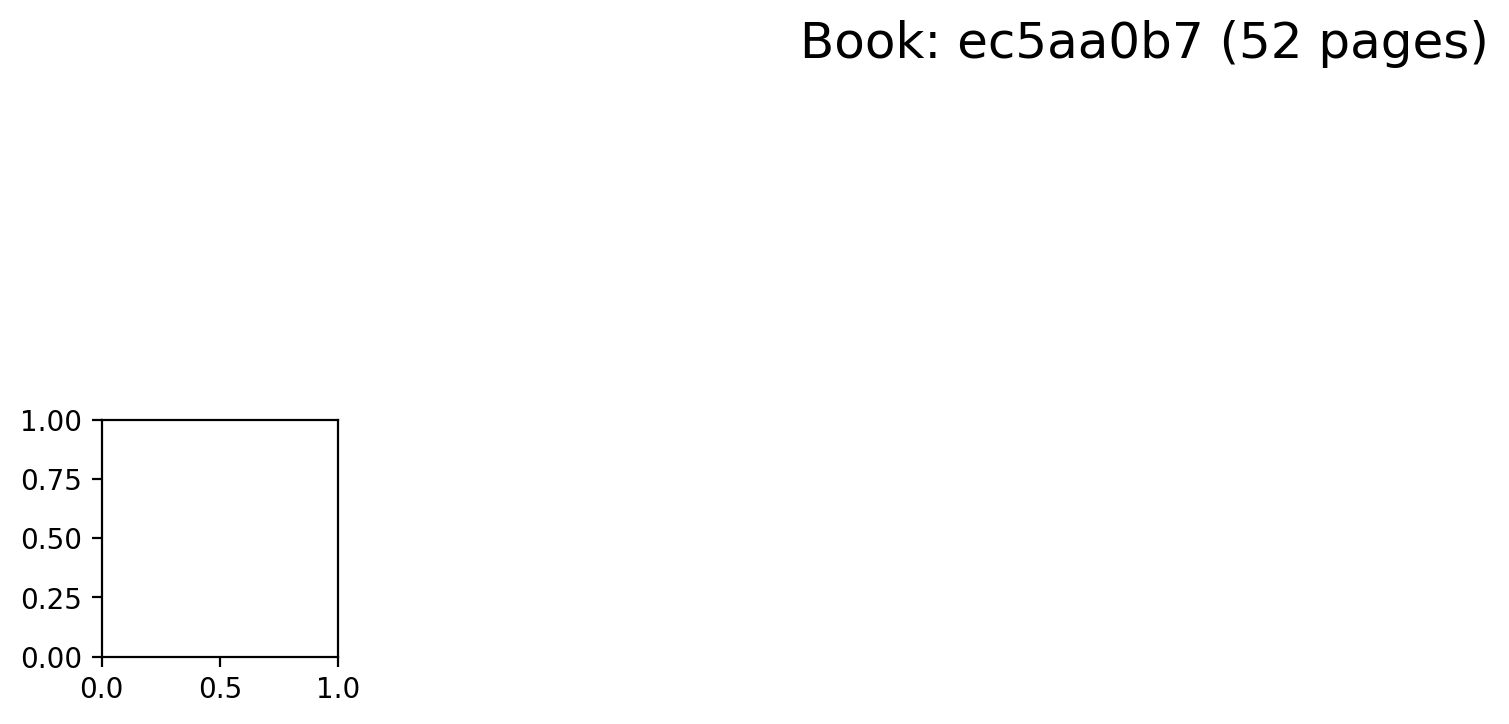

In [21]:
visualize_book(test_dataset, book_idx=2, dpi=200, transforms=transformations)
plt.show()

In [ ]:
def batch_visualize_books(dataset, output_dir, dpi=150):
    """
    Generate and save visualizations for all books in the dataset
    
    Args:
        dataset: The PSSDataset instance
        output_dir: Directory to save visualizations
        dpi: Resolution for saved images
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    print(f"Found {len(dataset.books)} unique books to visualize")
    
    for book in dataset.books:
        try:
            book_id = book['book_id']
            fig = visualize_book(dataset, book_id=book_id, dpi=dpi, transforms=dataset.transform)

            output_path = os.path.join(output_dir, f"{book_id}.png")
            fig.savefig(output_path, bbox_inches='tight')
            plt.close(fig)  # Close to free memory
        except Exception as e:
            print(f"Error visualizing book {book_id}: {e}")
    
    print(f"Visualizations saved to {output_dir}")

Found 87 unique books to visualize
Creating visualization...


/home-local/mserrao/miniconda3/envs/magi/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:719: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  x = np.array(x, subok=True, copy=copy)


Error visualizing book 00411460: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 761c7920: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book ec5aa0b7: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 550a141f: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book e0c64119: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 31fefc0e: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 8fe0093b: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book bd686fd6: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 487d4c6a: Image data of dtype <U98 cannot be converted to float
Creating 

/home-local/mserrao/PSSComics/multimodal-comic-pss/EncoderClassifier/utils/visualitzation.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize, dpi=dpi)


Error visualizing book 9597353e: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 0c048b3a: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 4a533591: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 0d0fd7c6: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 819f46e5: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 09060616: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book d34ab169: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book 52720e00: Image data of dtype <U98 cannot be converted to float
Creating visualization...
Error visualizing book d709f38e: Image data of dtype <U98 cannot be converted to float
Creating 

KeyboardInterrupt: 

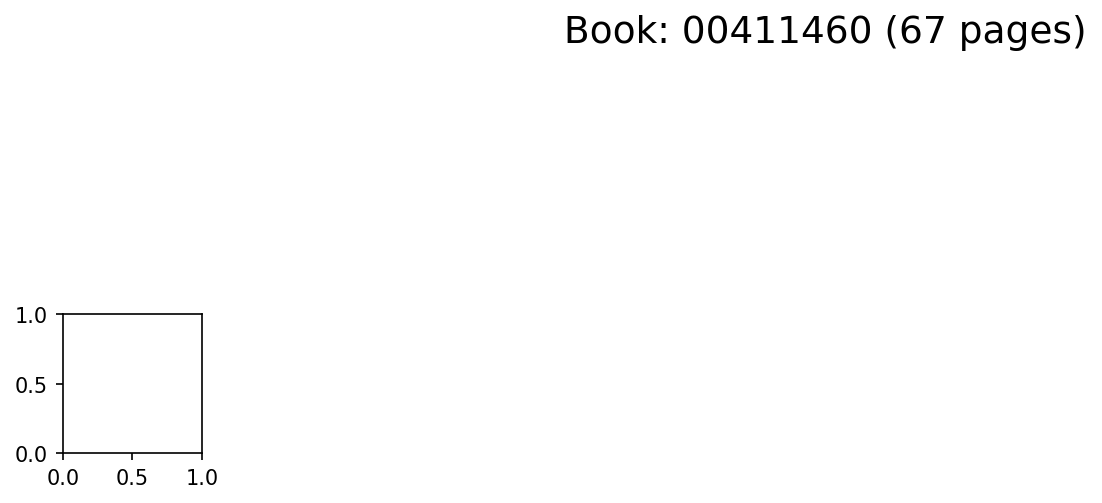

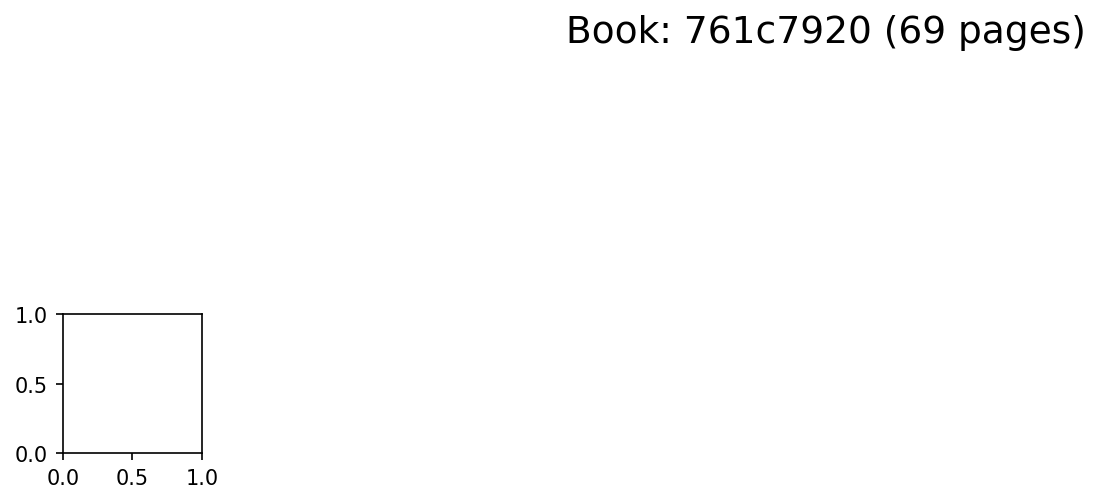

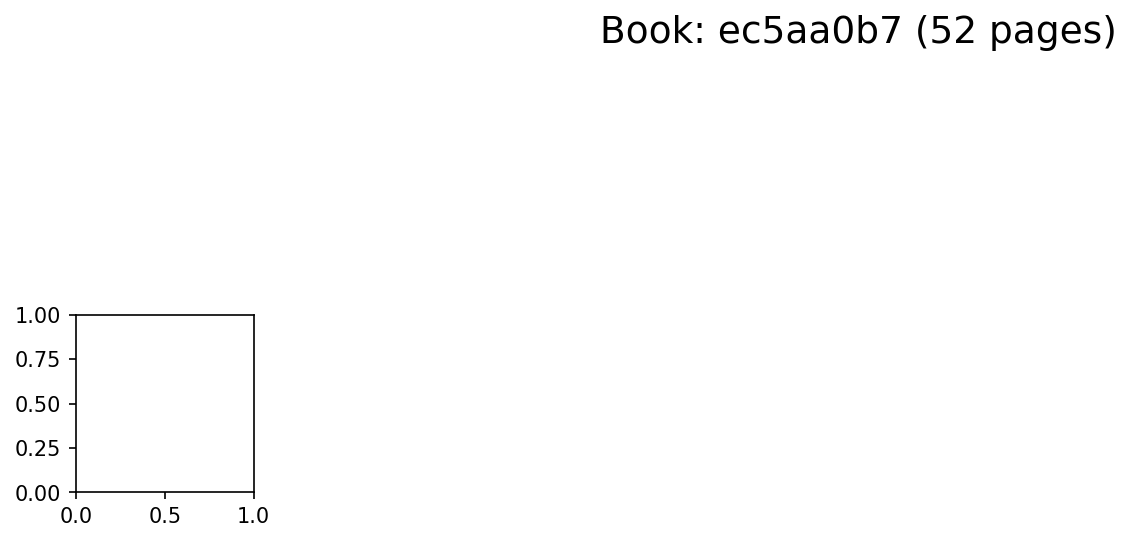

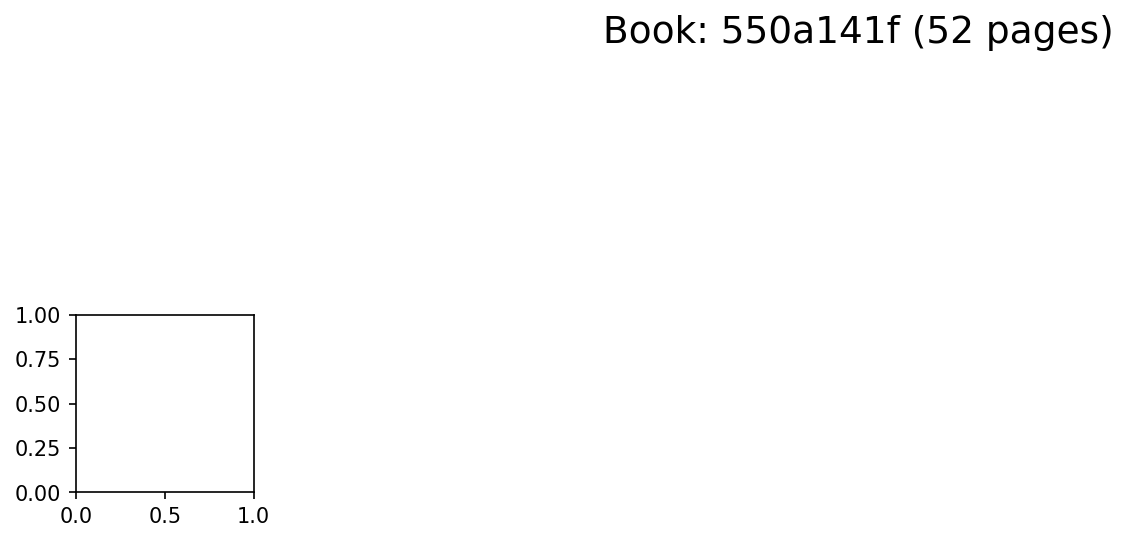

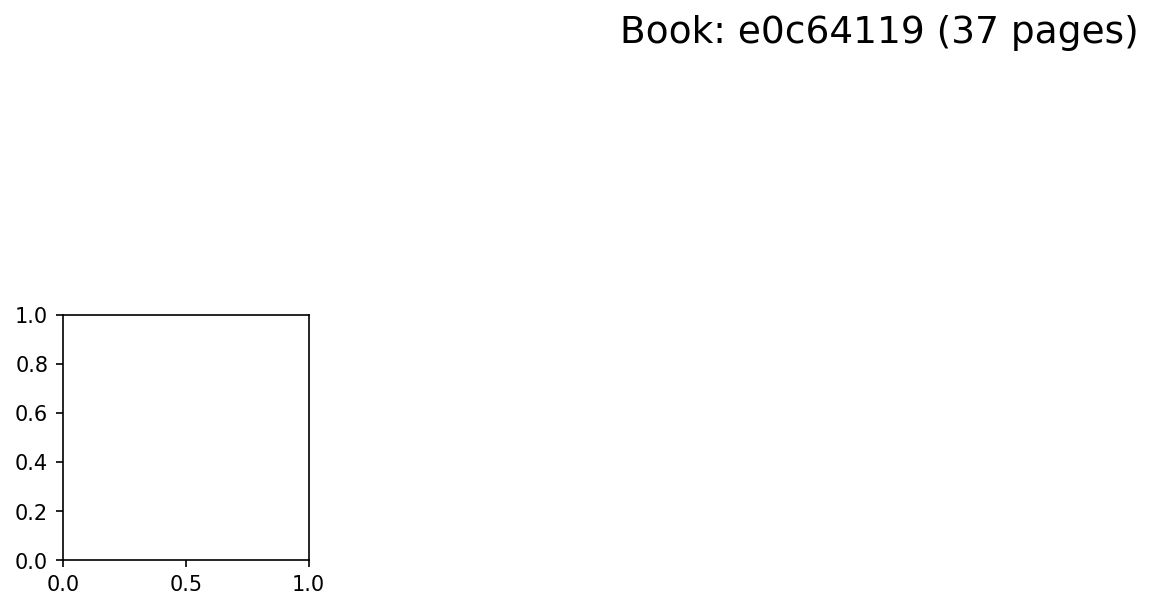

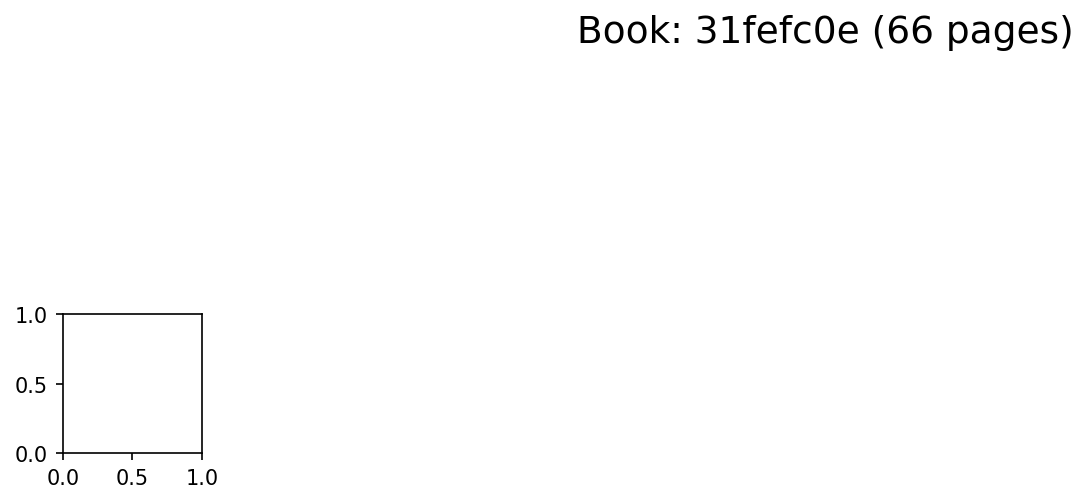

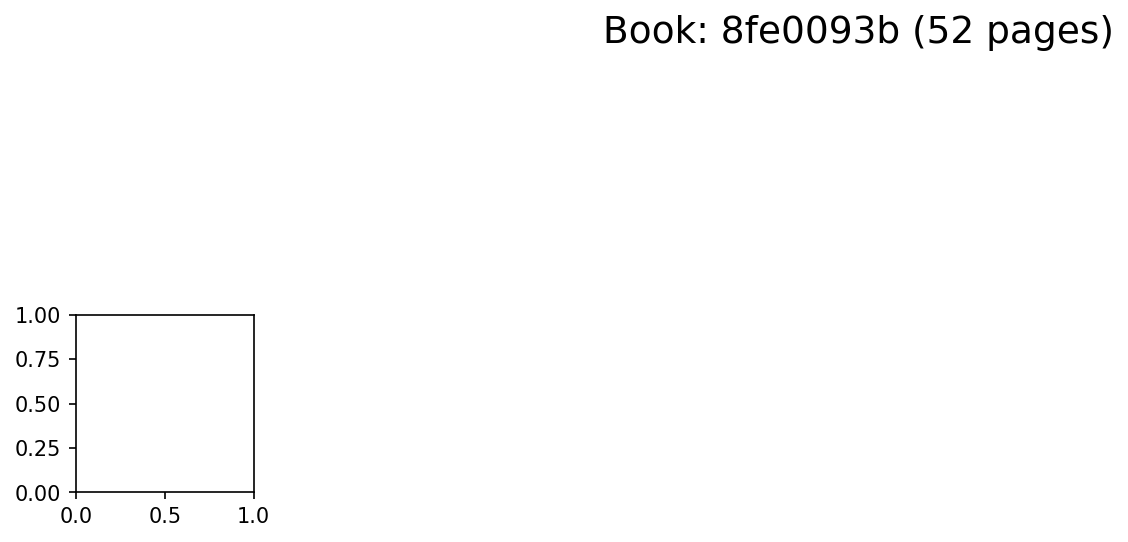

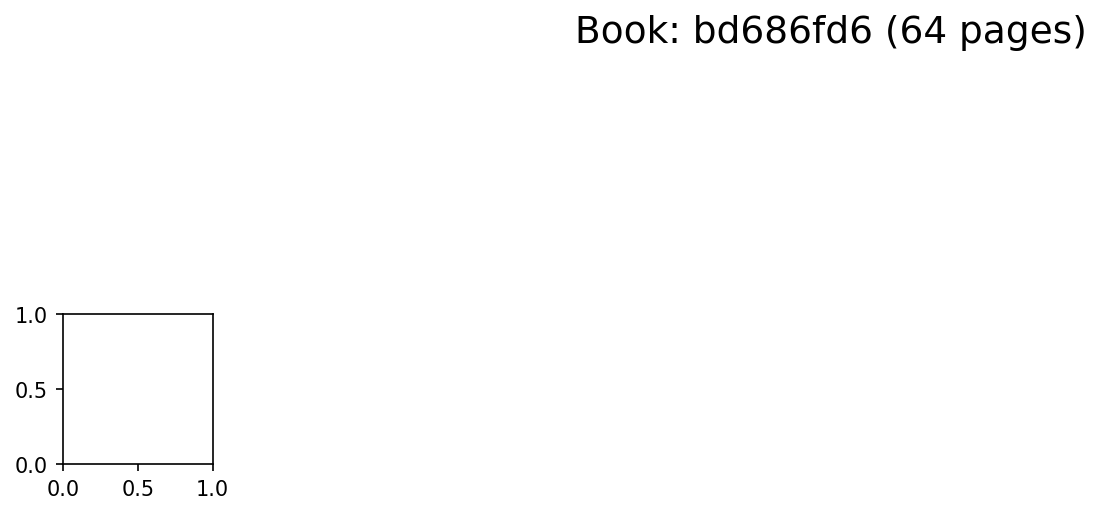

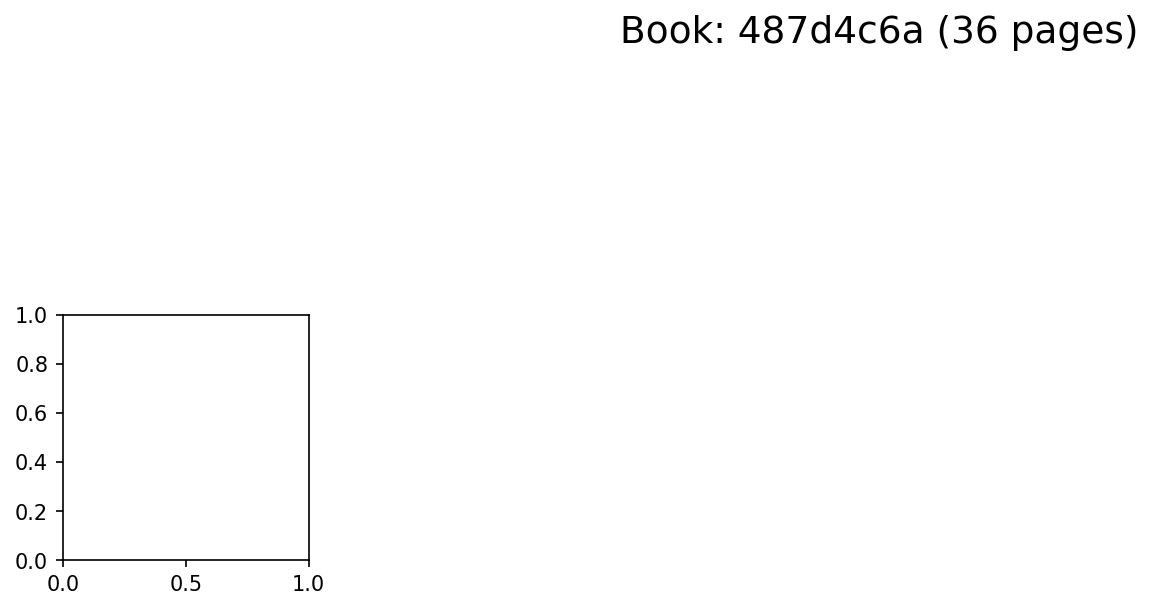

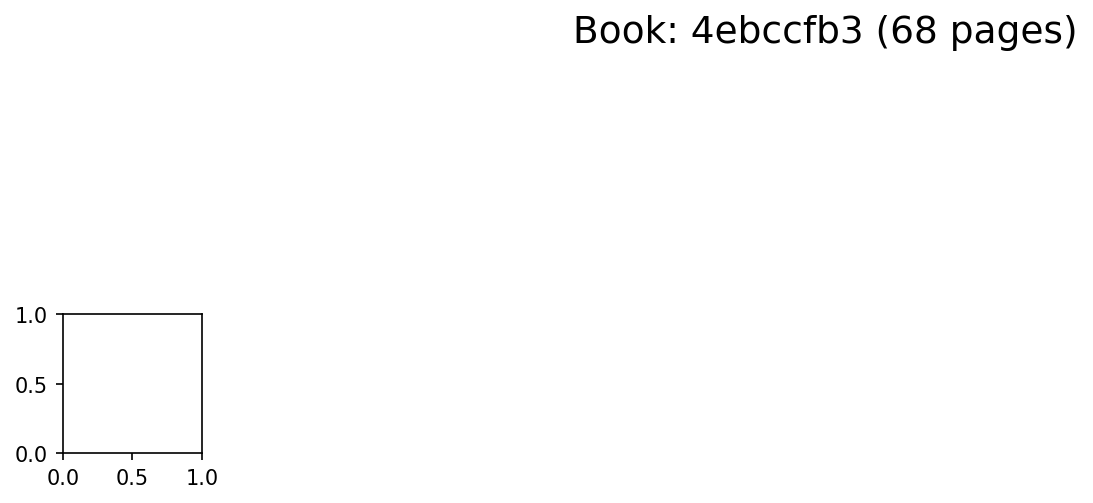

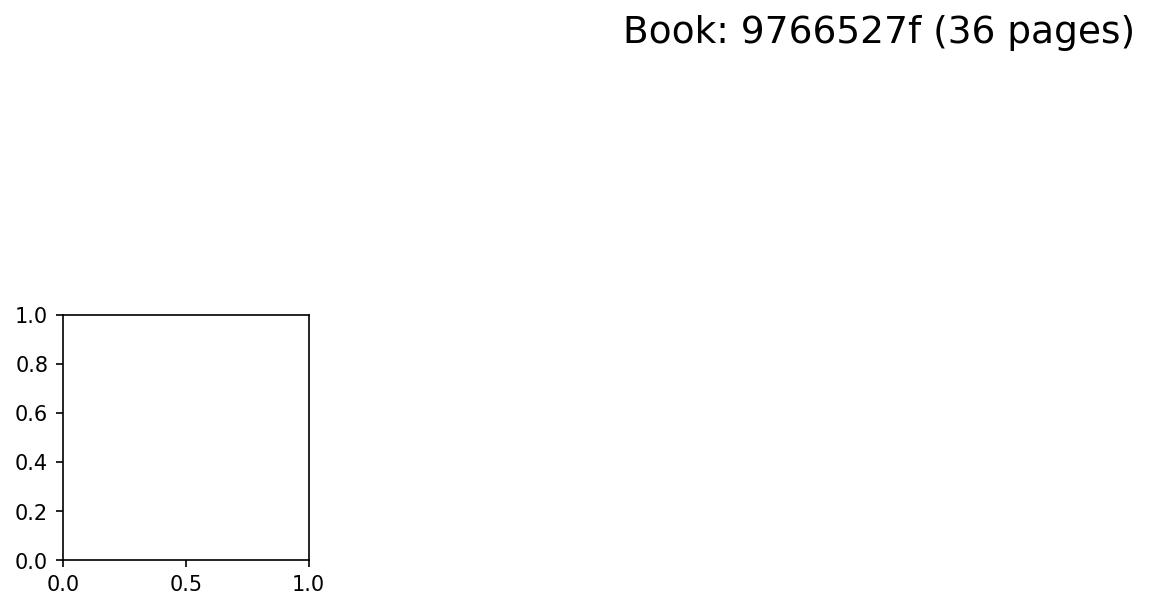

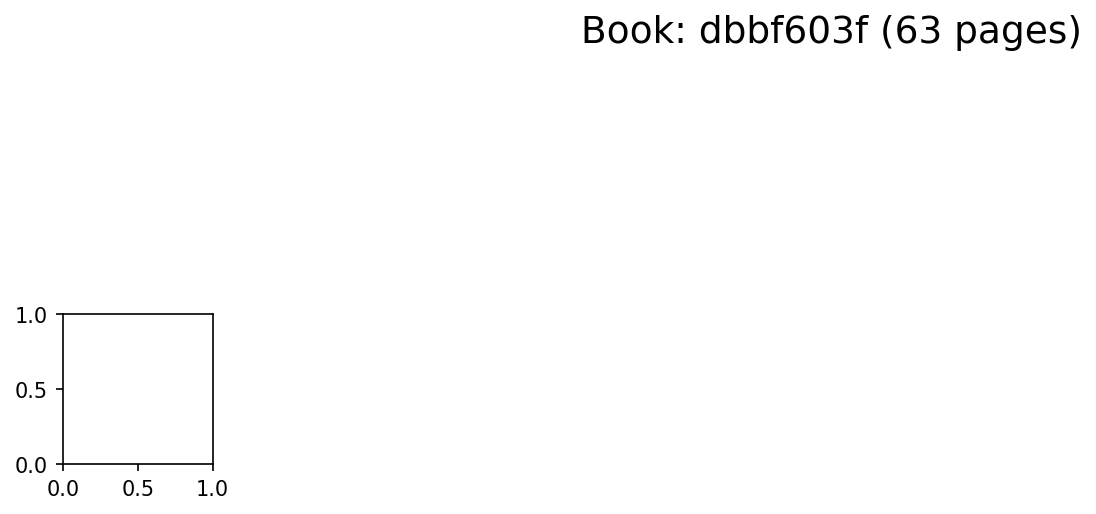

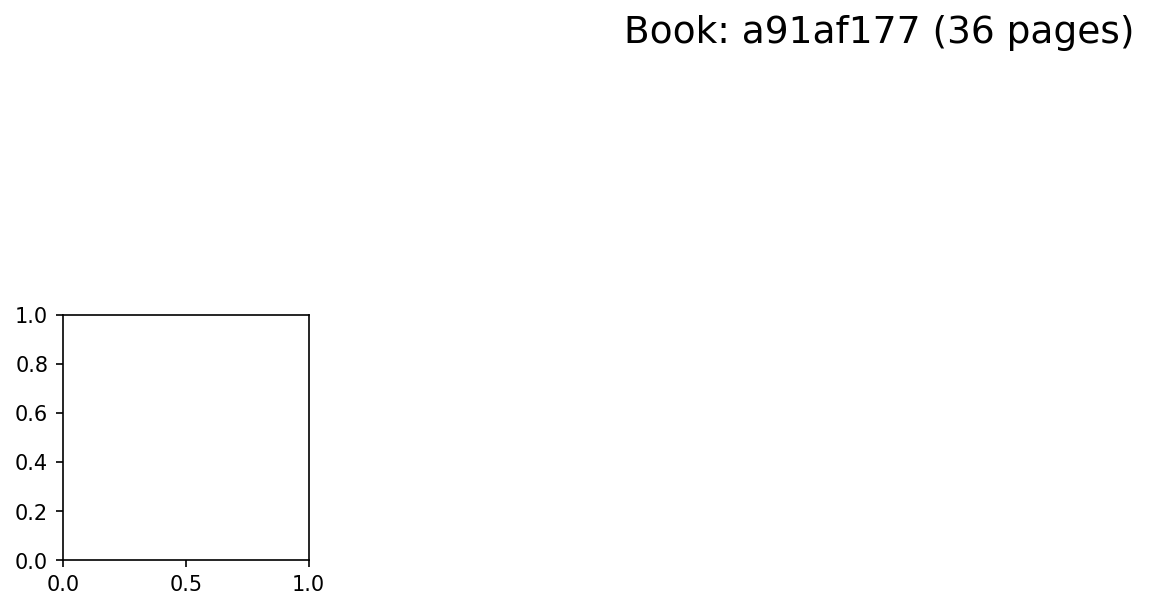

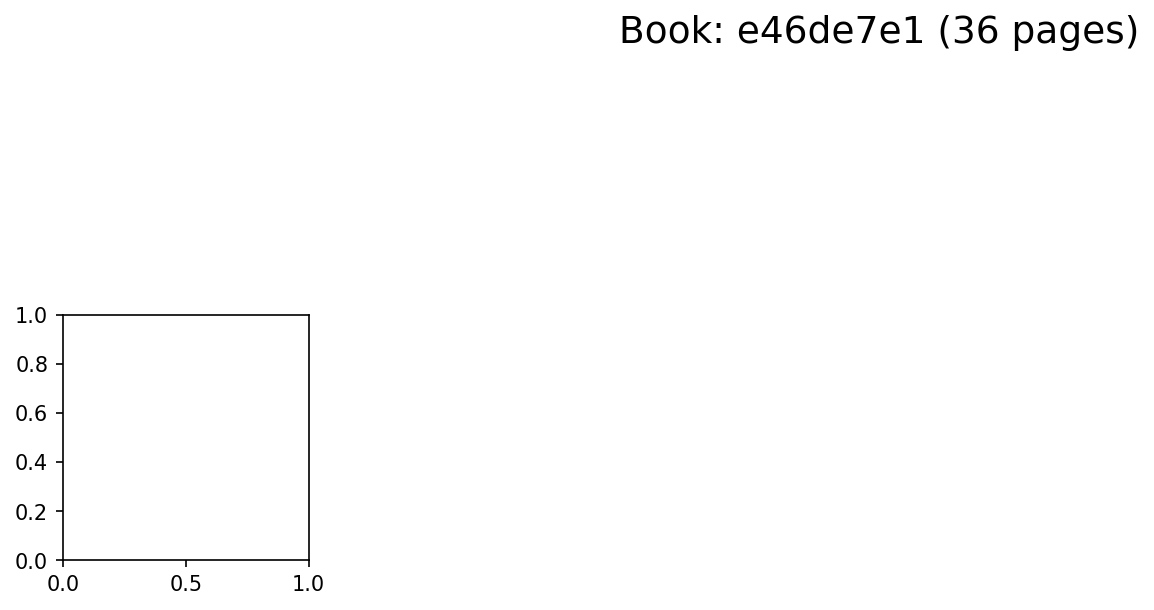

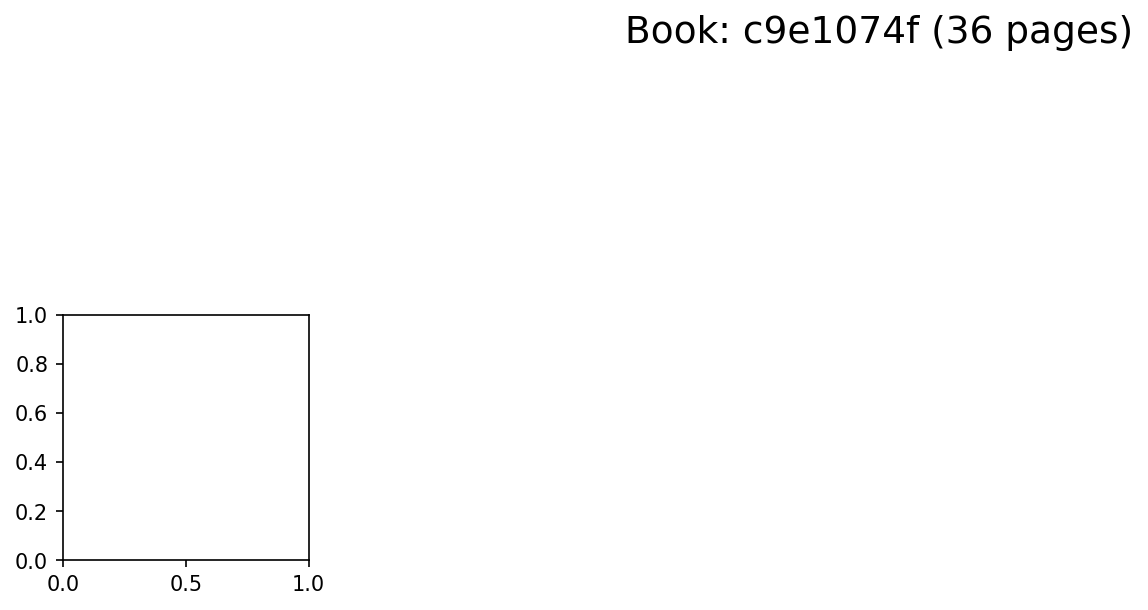

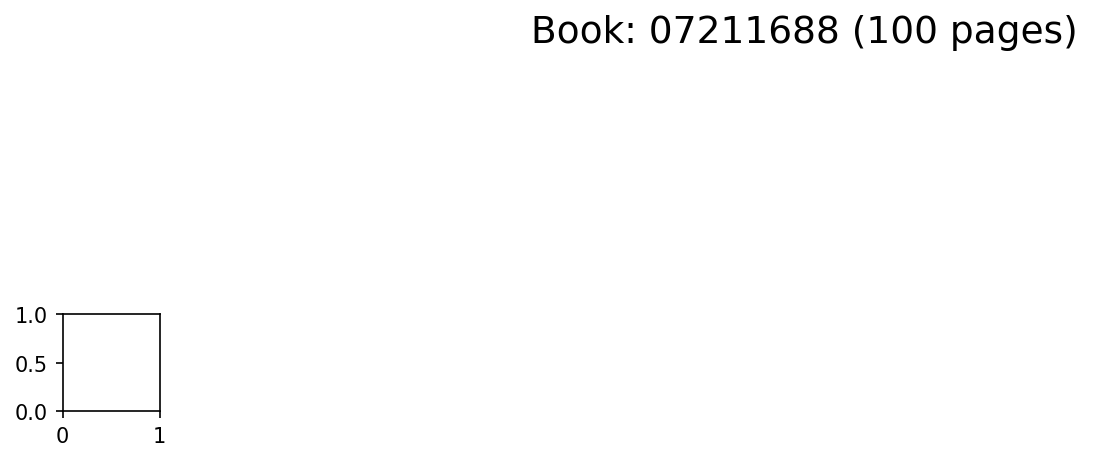

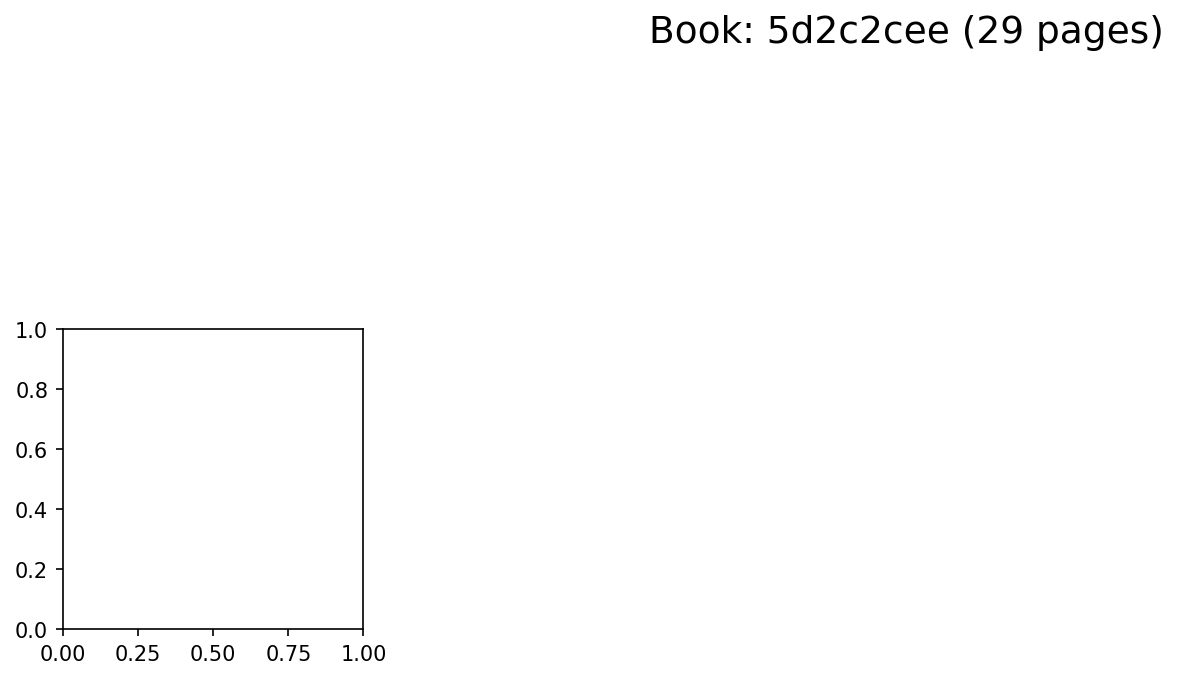

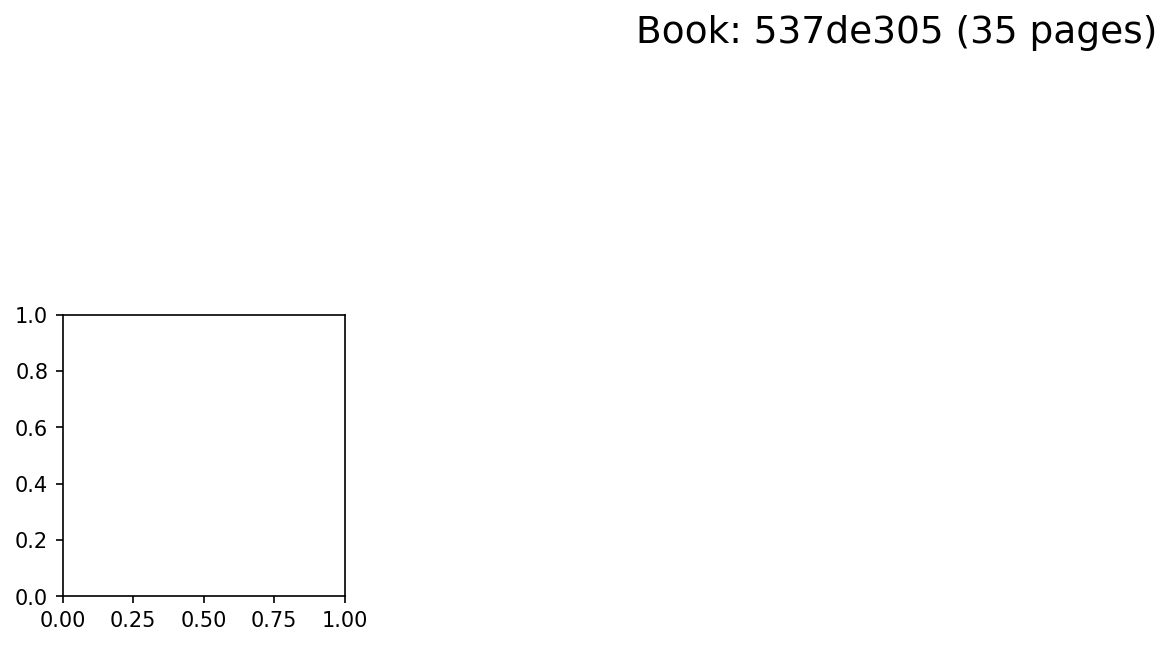

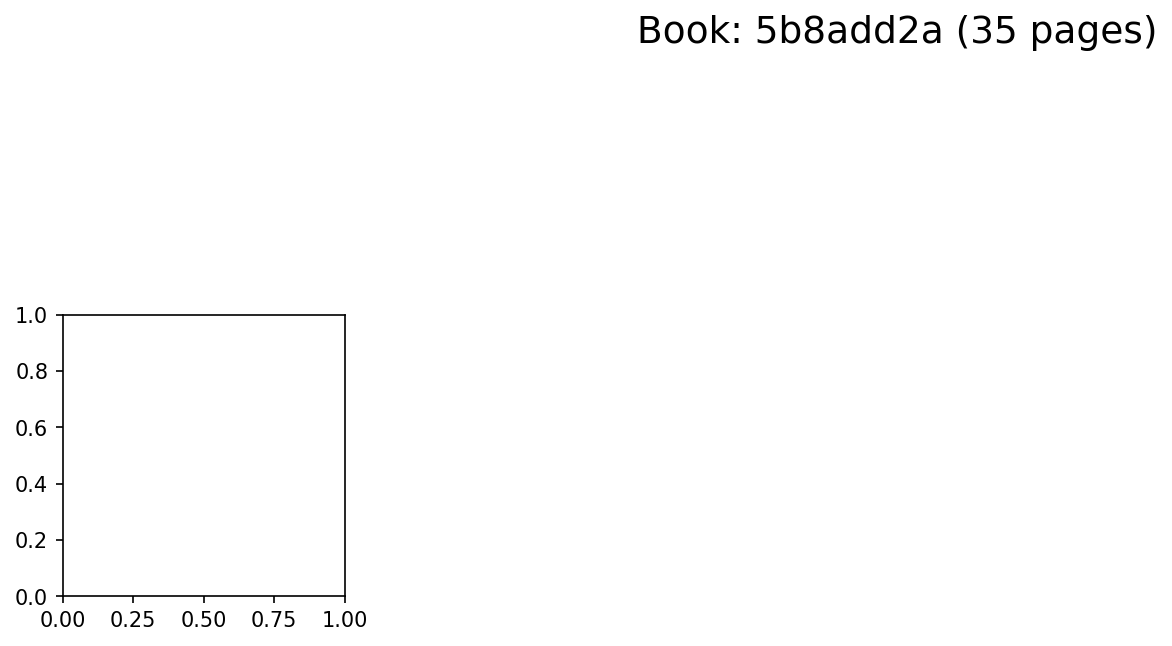

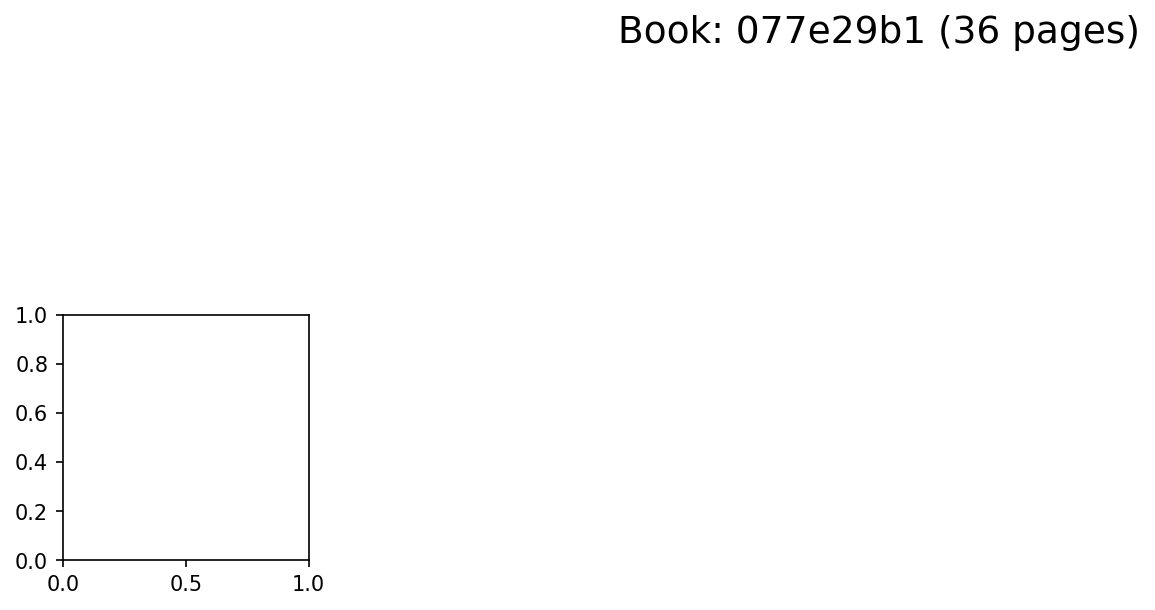

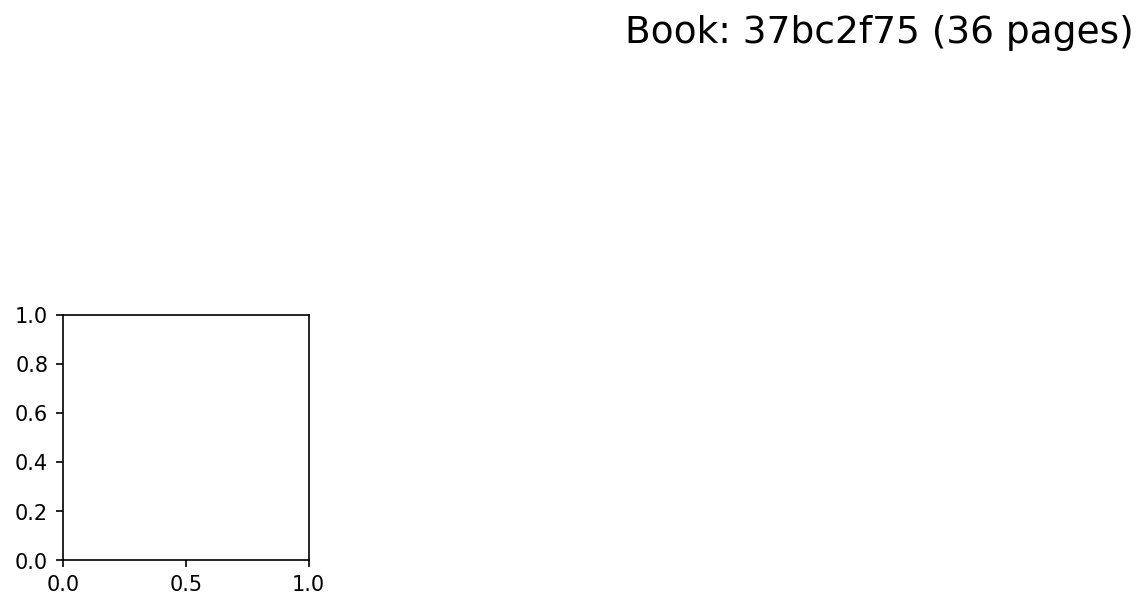

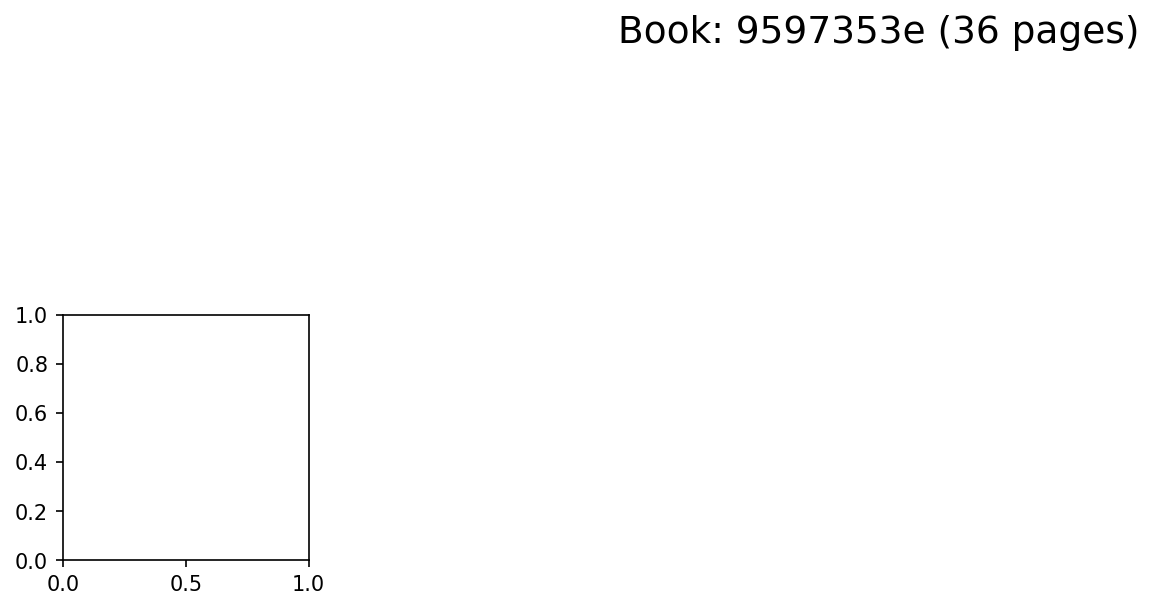

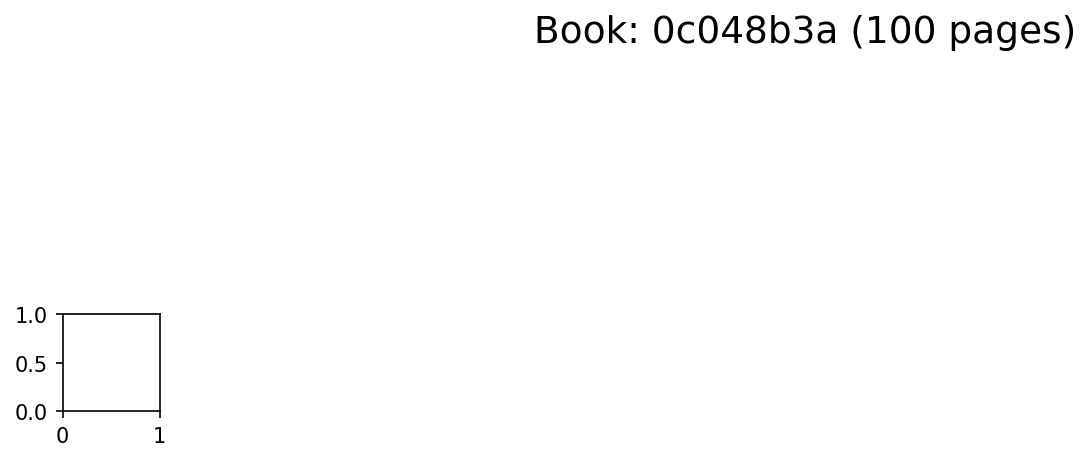

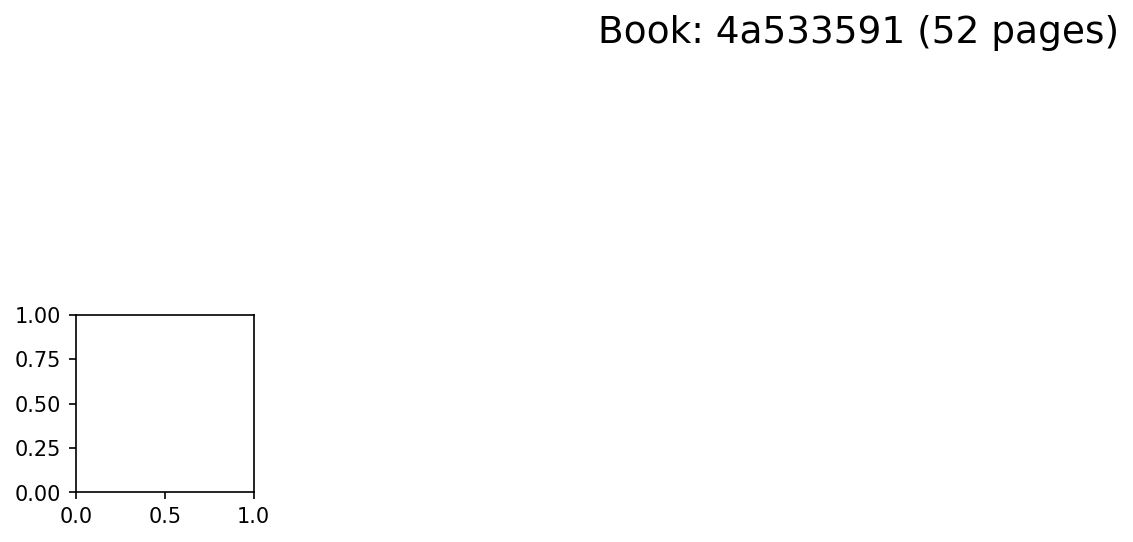

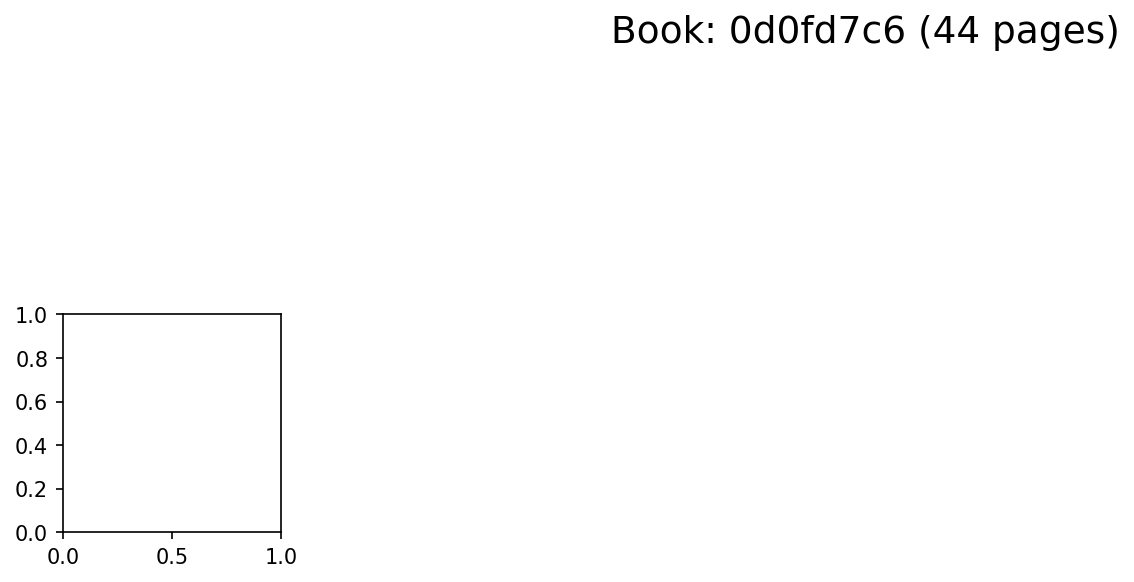

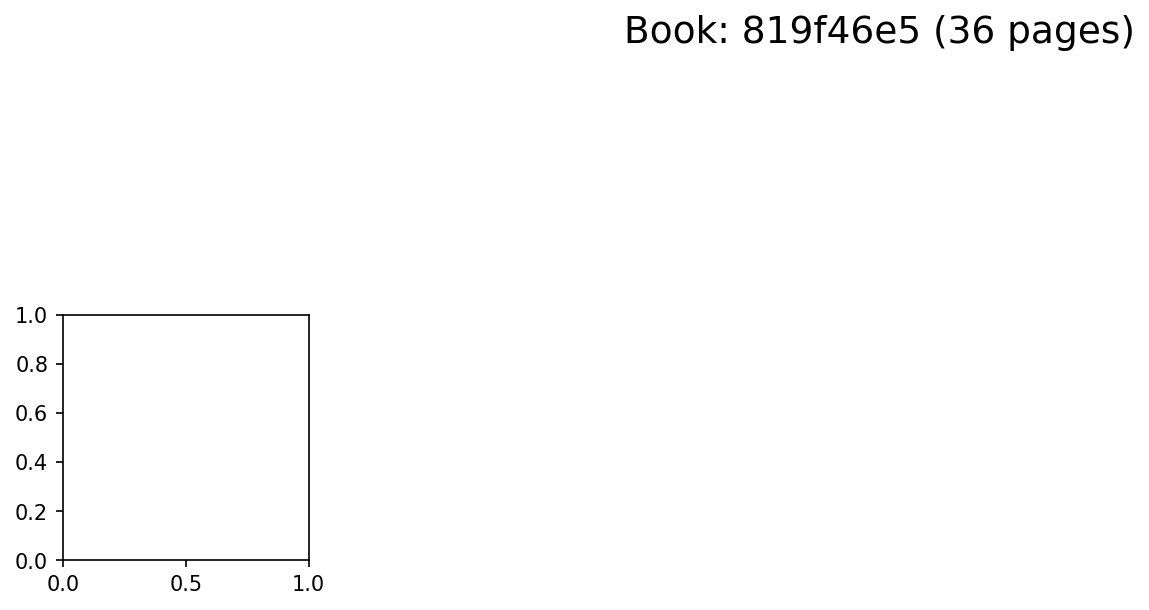

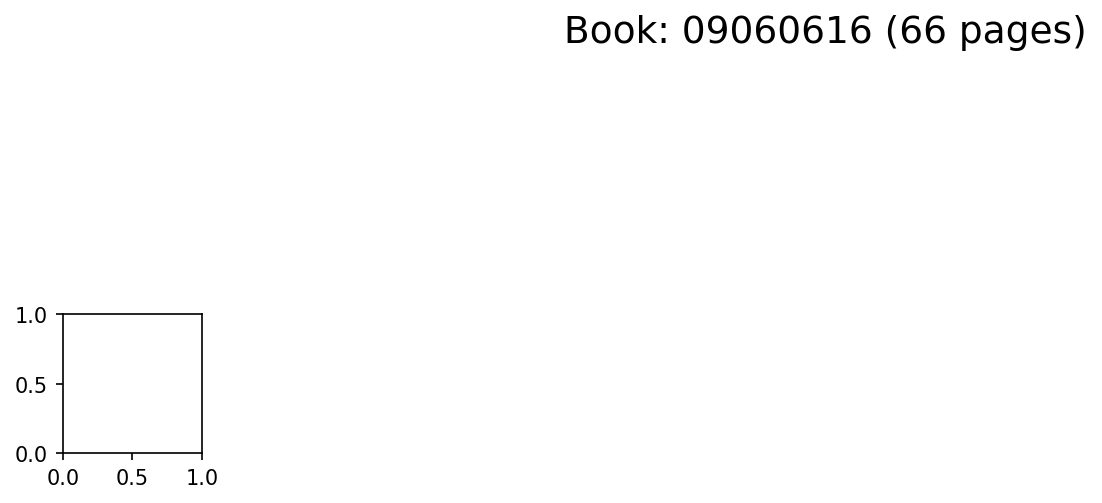

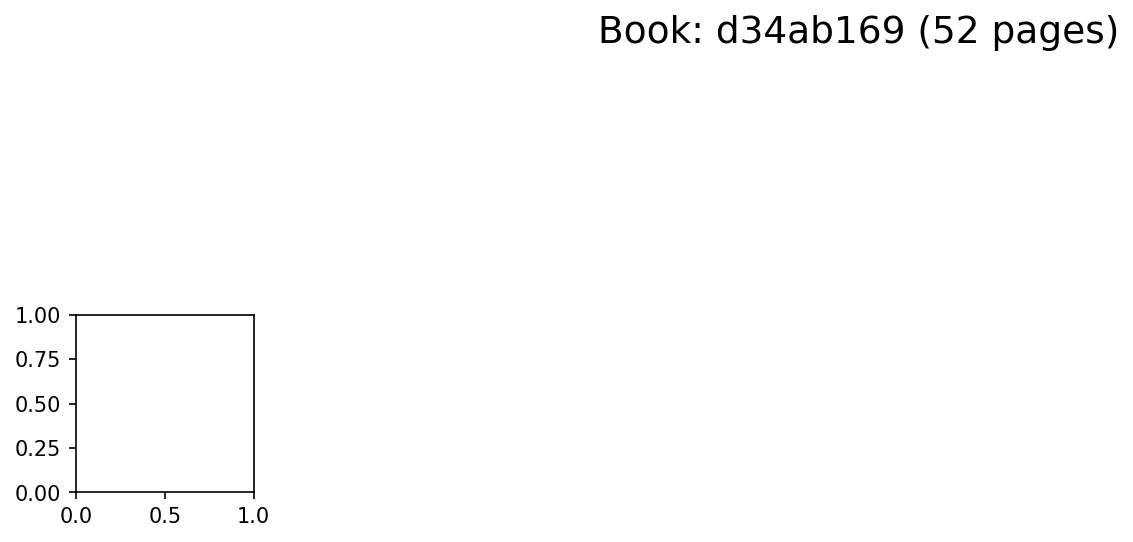

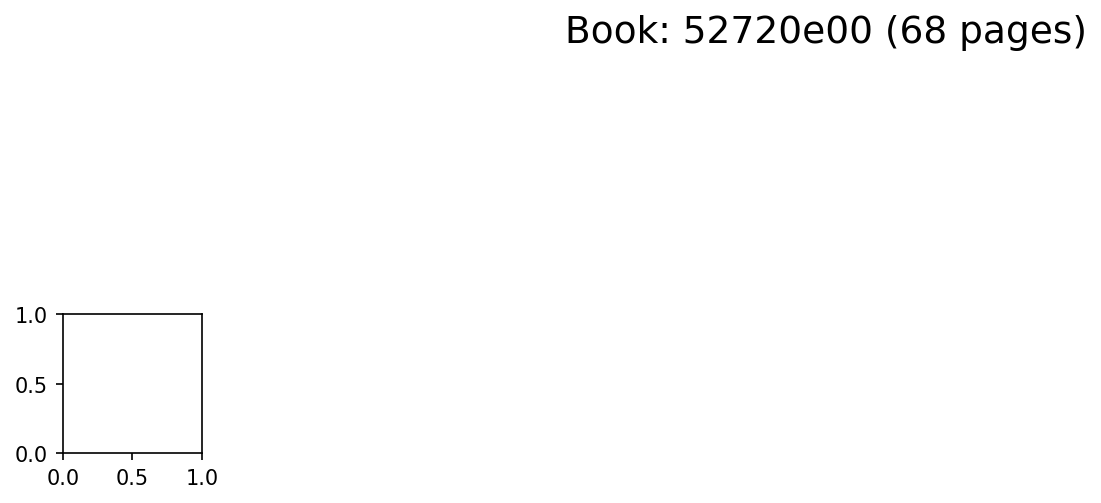

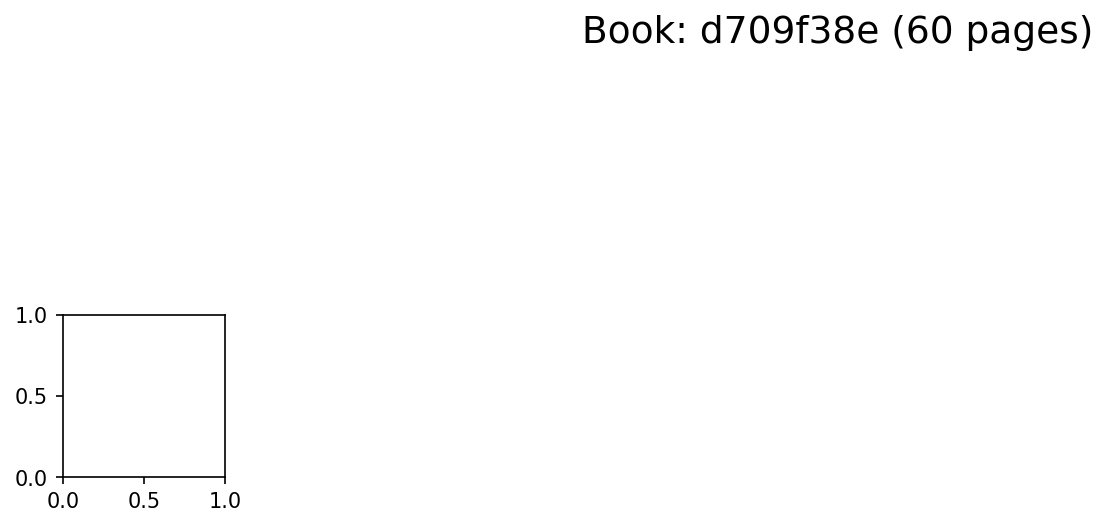

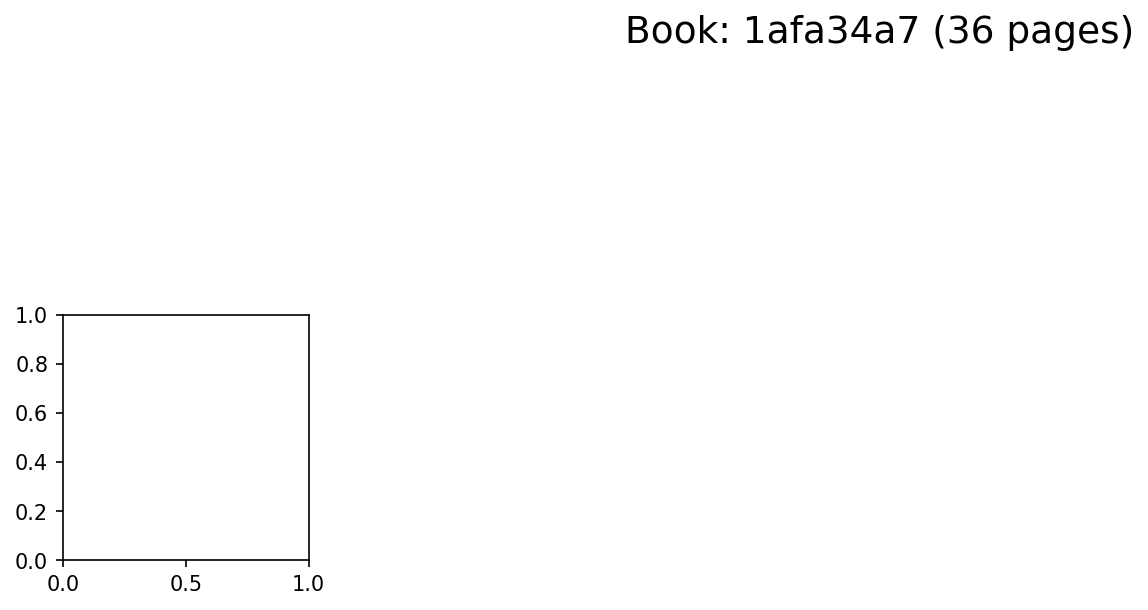

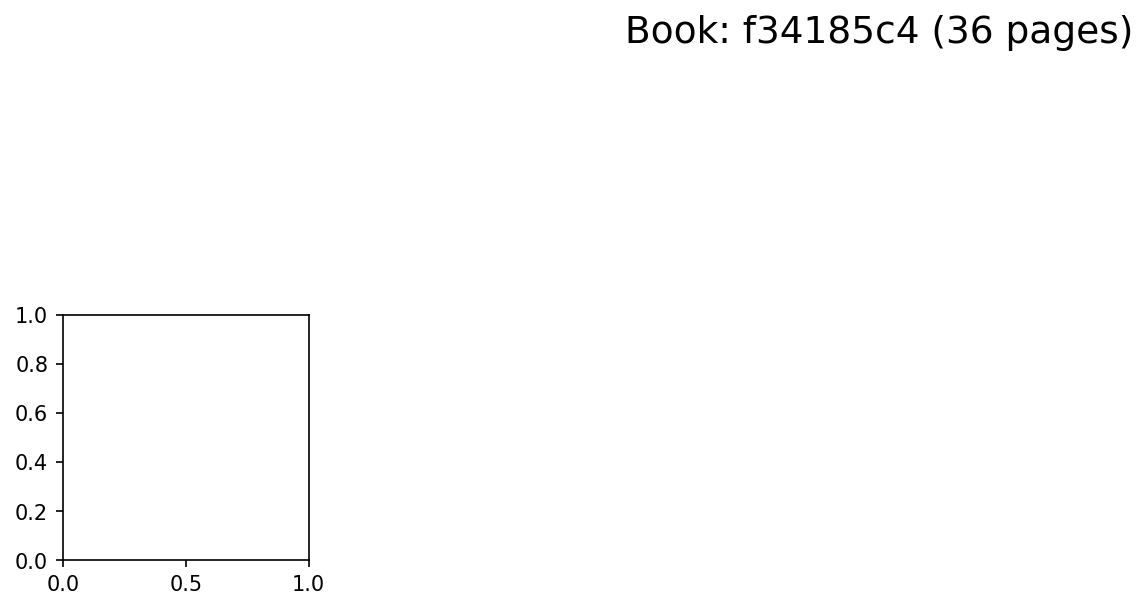

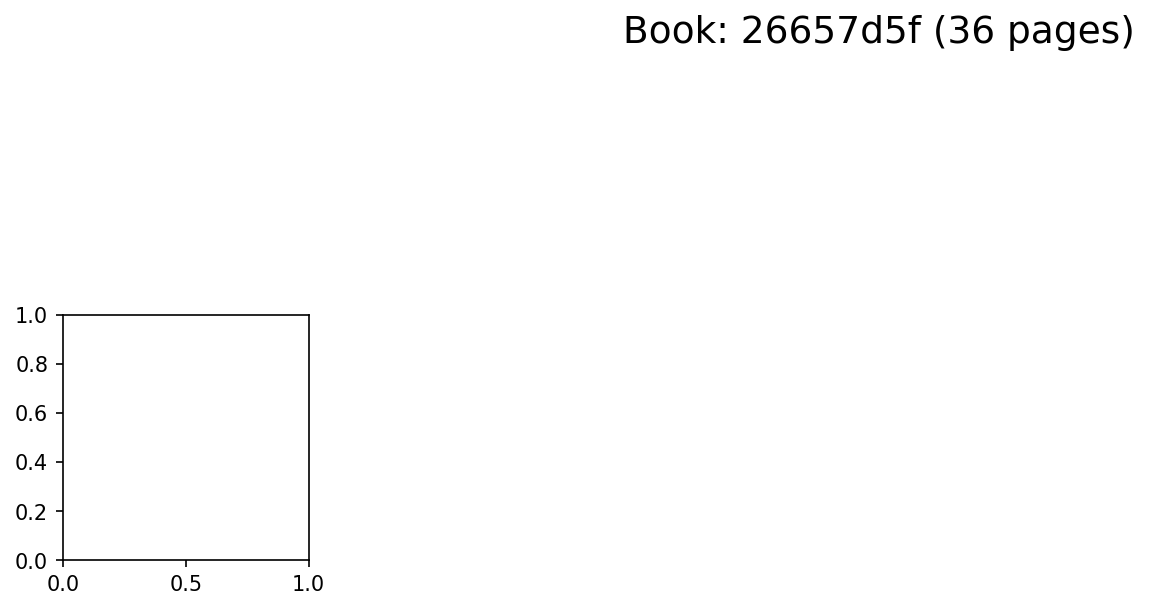

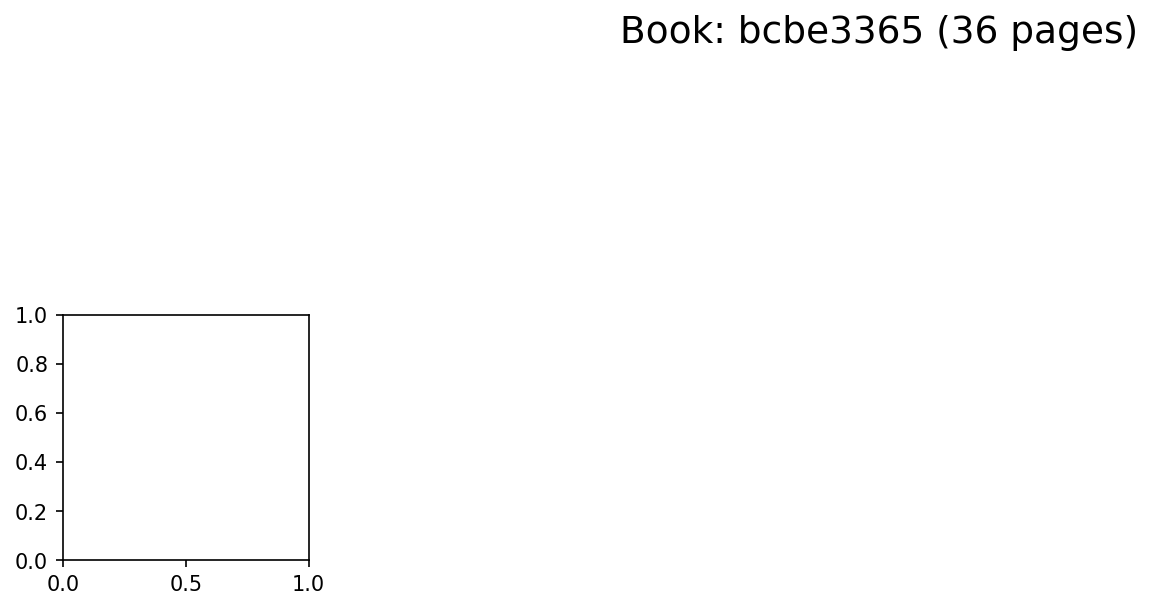

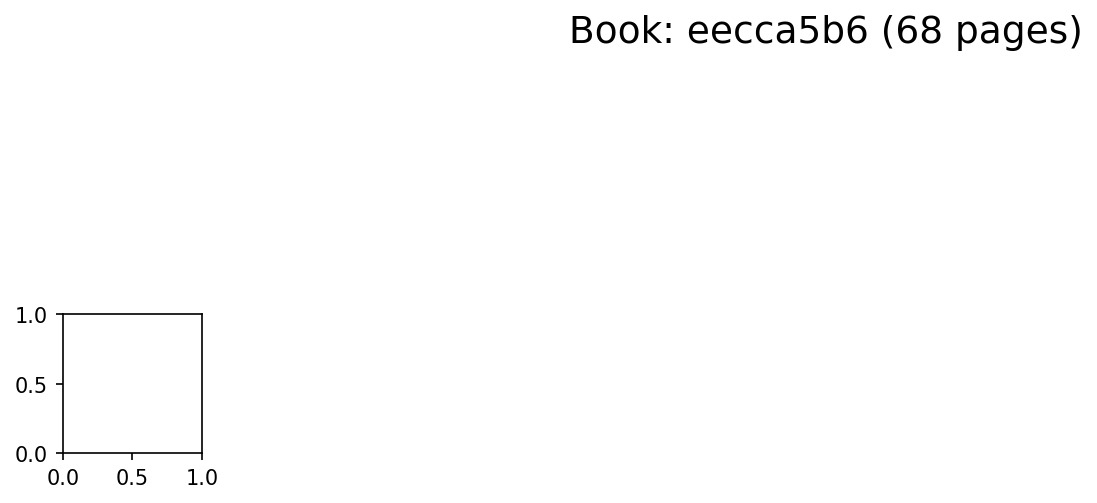

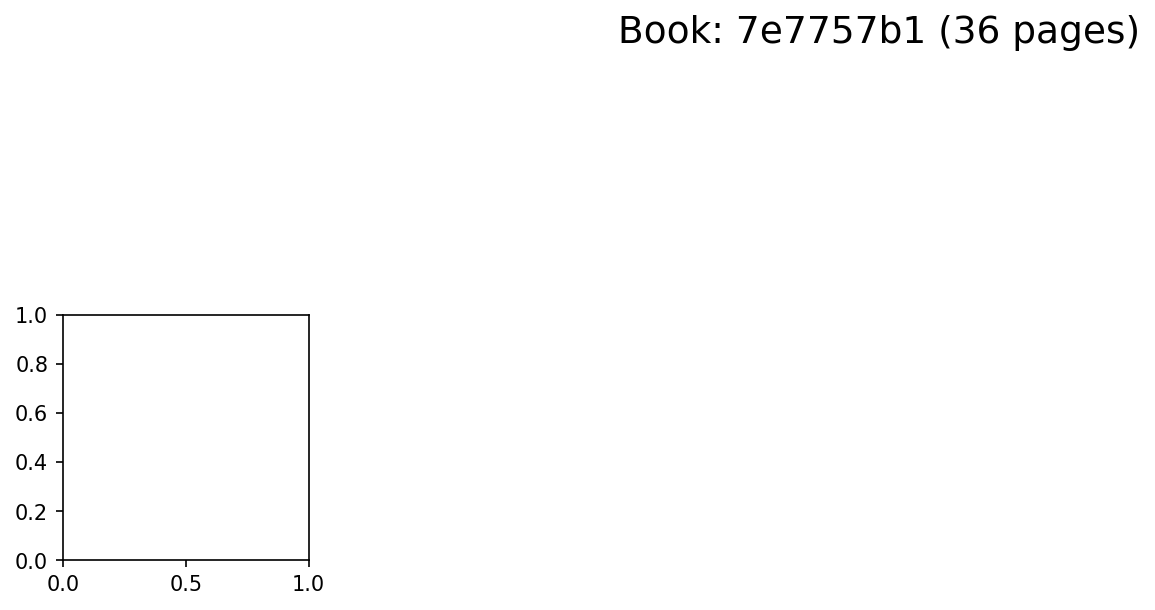

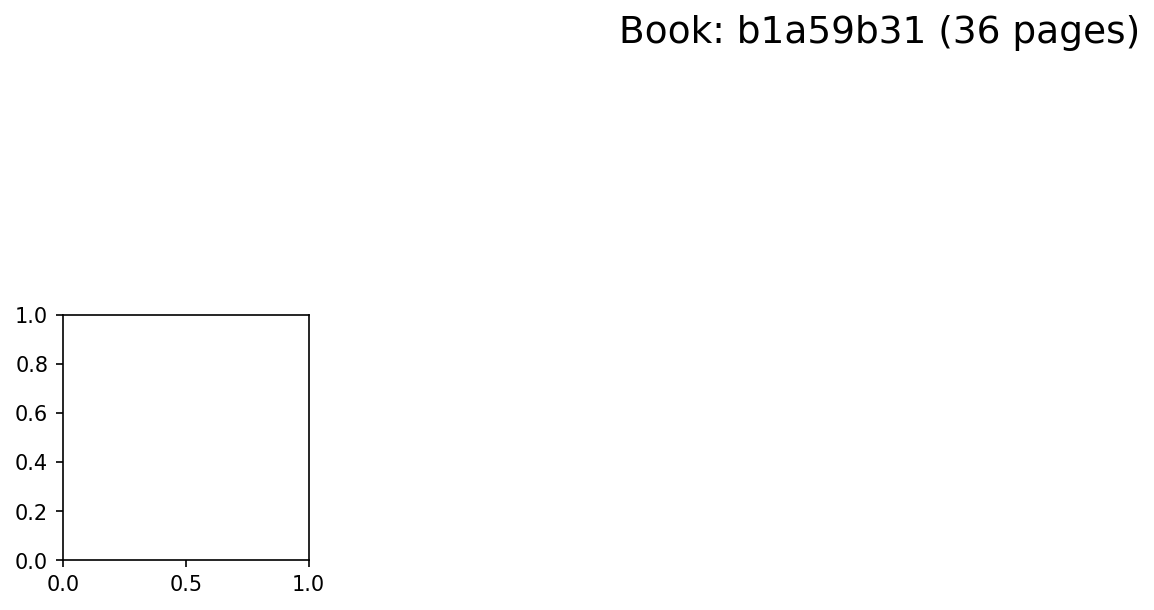

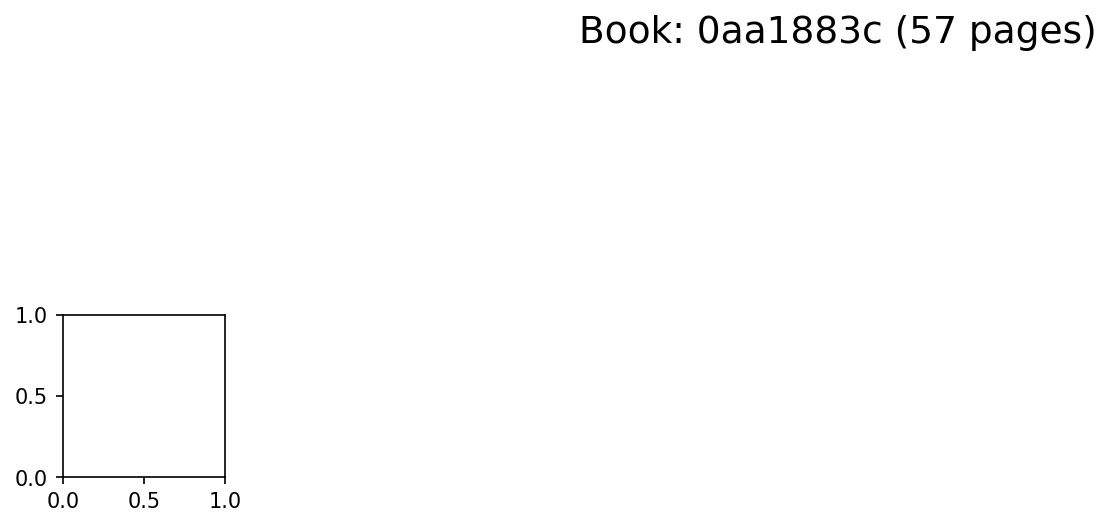

<Figure size 2250x3000 with 0 Axes>

In [ ]:
visualization_dir = '/home-local/mserrao/PSSComics/multimodal-comic-pss/visualizations/test_dataset'

batch_visualize_books(test_dataset, visualization_dir)